In [382]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Đọc và thể hiện dữ liệu

In [383]:
df = pd.read_csv("C:/Users/tuyet/Downloads/archive (6)/shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1702,1703,54,Male,Jeans,Clothing,83,Alabama,XL,Yellow,Summer,5.0000,No,Express,No,No,48,Bank Transfer,Weekly
3852,3853,65,Female,Hat,Accessories,79,Mississippi,M,Peach,Fall,4.0000,No,2-Day Shipping,No,No,19,PayPal,Weekly
301,302,46,Male,Skirt,Clothing,95,Pennsylvania,M,Green,Spring,3.8000,Yes,Standard,Yes,Yes,25,Credit Card,Every 3 Months
3362,3363,50,Female,Handbag,Accessories,61,Tennessee,M,Gray,Summer,3.0000,No,Next Day Air,No,No,48,Venmo,Fortnightly
3302,3303,36,Female,Blouse,Clothing,82,Alabama,XL,Beige,Winter,4.2000,No,Standard,No,No,31,Venmo,Bi-Weekly


Xem thông tin về số chiều dữ liệu

In [384]:
df.shape

(3900, 18)

Xem thông tin về các cột trong dữ liệu

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Xác định số lượng giá trị bị thiếu (NaN) trong mỗi cột của một DataFrame

In [386]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

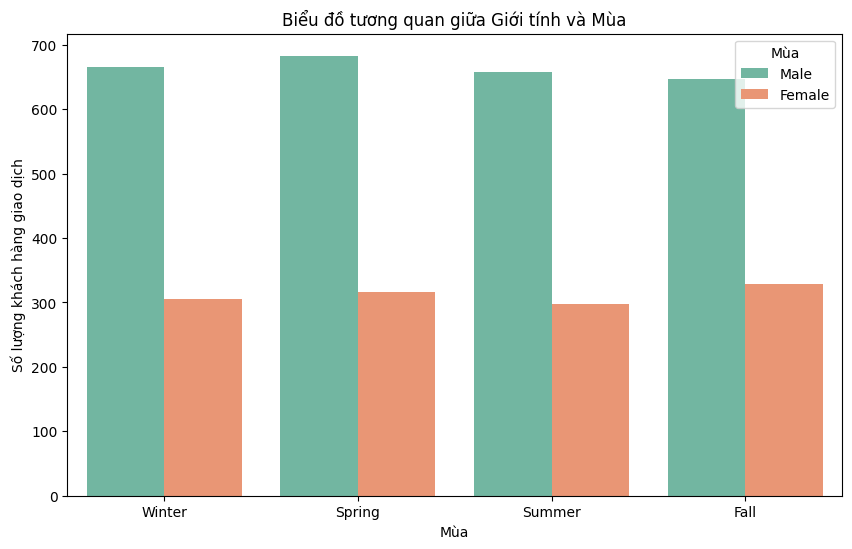

In [387]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season', hue='Gender', palette='Set2')
# Thêm tiêu đề và nhãn
plt.title('Biểu đồ tương quan giữa Giới tính và Mùa')
plt.xlabel('Mùa')
plt.ylabel('Số lượng khách hàng giao dịch')
plt.legend(title='Mùa')
plt.show()

## Phân tích dữ liệu

In [388]:
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44','45-49', '50-54','55-59', '60-64', '65-70']
df['Age'] = pd.cut(df['Age'], age_bins, labels = age_labels,include_lowest = True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,50-54,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1000,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,18-24,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1000,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,45-49,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1000,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,18-24,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5000,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,40-44,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7000,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,35-39,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2000,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,50-54,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5000,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,45-49,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9000,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,40-44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8000,No,Express,No,No,24,Venmo,Weekly


In [389]:
# Mã hóa One-hot 'Age', 'Item Purchased' và 'Payment Method' riêng biệt
one_hot_ages = pd.get_dummies(df['Age'], prefix='Age')
one_hot_items = pd.get_dummies(df['Item Purchased'], prefix='Item Purchased')
one_hot_payment = pd.get_dummies(df['Payment Method'], prefix='Payment Method')

# Đổi tên các cột để có định dạng mong muốn
one_hot_ages.columns = [f'Age = {col.split("_")[-1]}' for col in one_hot_ages.columns]
one_hot_items.columns = [f'Item Purchased = {col.split("_")[-1]}' for col in one_hot_items.columns]
one_hot_payment.columns = [f'Payment Method = {col.split("_")[-1]}' for col in one_hot_payment.columns]

# Kết hợp các one-hot encoding lại với nhau
df_encoded = pd.concat([df['Customer ID'], one_hot_ages, one_hot_items, one_hot_payment], axis=1)
# Bỏ cột 'Customer ID' vì không cần thiết cho thuật toán Apriori
df_encoded = df_encoded.drop('Customer ID', axis=1)
df_encoded

,Age = 18-24,Age = 25-29,Age = 30-34,Age = 35-39,Age = 40-44,Age = 45-49,Age = 50-54,Age = 55-59,Age = 60-64,Age = 65-70,...,Item Purchased = Socks,Item Purchased = Sunglasses,Item Purchased = Sweater,Item Purchased = T-shirt,Payment Method = Bank Transfer,Payment Method = Cash,Payment Method = Credit Card,Payment Method = Debit Card,Payment Method = PayPal,Payment Method = Venmo
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3896,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3897,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3898,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Xây dựng thuật toán Apriori

Trước hết, chúng ta sẽ xây dựng phương thức `generate_candidates()` để sinh ra các tập candidate itemset có k phần tử

In [390]:
from itertools import combinations

# Tạo ra tập candidate itemsets có k phần tử
def generate_candidates(prev_candidates: list[frozenset], k: int) -> list[frozenset]:
    candidates = []
    n_candidates = len(prev_candidates)

    for i in range(n_candidates):
        for j in range(i + 1, n_candidates):
            itemset1 = list(sorted(prev_candidates[i]))
            itemset2 = list(sorted(prev_candidates[j]))
            
            if itemset1[:k-2] != itemset2[:k-2]: # Để join được thì itemset1 và itemset2 phải có k-2 phần tử đầu tiên giống nhau
                continue

            new_candidate = set(itemset1).union(set(itemset2))
            new_candidate = frozenset(sorted(new_candidate)) # Chuyển về frozenset (set không thay đổi giá trị)
            # Kiểm tra tính chất apriori: mọi subset của candidate cũng phải là frequent itemset
            is_valid_candidate = True
            for subset in combinations(new_candidate, k - 1):
                if frozenset(subset) not in prev_candidates:
                    is_valid_candidate = False
                    break
            
            if is_valid_candidate is True:
                candidates.append(new_candidate)
    return candidates

Sau đó chúng ta sẽ xây dựng phương thức `apriori_algorithm()` để tìm ra các quy luật của các transaction

In [391]:
# Tạo ra các frequent itemsets từ transactions với minimum support
def apriori_algorithm(transactions: list[frozenset], min_support: float) -> dict[int, list[frozenset]]:
    itemsets = {}
    n = len(transactions)
    min_support_count = n * min_support
    
    # Khởi tạo itemsets với kích cỡ k = 1
    itemsets[1] = []
    item_counts = {}
    
    # Đếm các item đơn lẻ trong transactions
    for transaction in transactions:
        for item in transaction:
            if item in item_counts:
                item_counts[item] += 1
            else:
                item_counts[item] = 1
    
    # Lọc ra các item đơn lẻ có số lần xuất hiện >= min_support_count
    for item, count in item_counts.items():
        if count >= min_support_count:
            itemsets[1].append(frozenset((item,))) # (item,) -> tạo ra 1 danh sách tuple chứa 1 phần tử là item

    k = 2
    while itemsets[k-1]: # Tiếp tục lặp nếu itemsets[k-1] vẫn có phần tử
        # Tạo ra tập itemsets có k phần tử từ tập itemsets có k-1 phần tử
        candidates = generate_candidates(itemsets[k-1], k)
        
        # Khởi tạo dict để đếm số lần xuất hiện của các candidates
        candidate_counts = {candidate: 0 for candidate in candidates} # Lặp từng candidate trong tập candidates: mỗi lần lặp thì sẽ thêm vào trong bảng băm (dict) 1 cặp key là candidate, và value là 0
        # Đây là lí do tại sao phải dùng frozenset: vì nếu key có kiểu dữ liệu là set thì sẽ không dùng được trong bảng băm, frozenset là set nhưng không thay đổi giá trị -> gần giống như hằng số -> băm được

        # Đếm số lần xuất hiện của các candidates trong transactions
        for transaction in transactions:
            for candidate in candidates:
                if candidate.issubset(transaction): # Kiểm tra xem candidate có phải là 1 subset của transaction. Ví dụ: (1, 2) là subset của (3, 2, 5, 1) (không quan tâm thứ tự)
                    candidate_counts[candidate] += 1
        
        # Lọc ra các candidates có số lần xuất hiện >= min_support_count
        itemsets[k] = []
        for candidate, count in candidate_counts.items():
            if count >= min_support_count:
                itemsets[k].append(candidate)
        
        # Tăng k và tiếp tục lặp
        k += 1
    
    return itemsets

## Mô tả điều kiện dừng của Apriori

Thuật toán Apriori là một trong những thuật toán phổ biến nhất dùng để khai thác tập mục thường xuyên (frequent itemsets) trong cơ sở dữ liệu giao dịch. Điều kiện dừng của thuật toán Apriori được xác định khi không còn có thể tìm thấy tập mục thường xuyên mới từ cơ sở dữ liệu giao dịch nữa

## Xây dựng hàm tính quy luật

In [392]:
# Hàm tính support của một itemset
def calculate_support(itemset: frozenset, transactions: list[set]) -> float:
    length = len(transactions)
    count = 0
    for transaction in transactions:
        if itemset.issubset(transaction):
            count += 1
    return count / length

# Hàm tạo ra các luật kết hợp từ frequent itemsets
def association_rules(frequent_itemsets: dict[int, list[frozenset]], transactions: list[frozenset], min_confidence=0.6, min_lift=0.0) -> list[dict]:
    rules = []
    
    for k, itemsets in frequent_itemsets.items():
        # Bỏ qua các itemset có kích cỡ < 2 vì không thể tạo ra luật kết hợp từ chúng hoặc nếu không còn itemset nào
        if k < 2 or len(itemsets) == 0:
            continue
        
        for itemset in itemsets:
            itemset_support = calculate_support(itemset, transactions)

            # Lặp các subset và sinh ra quy luật
            # Lấy i là độ dài của subset
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent) # Tập đầu vào
                    consequent = frozenset(sorted(itemset - antecedent)) # Tạo ra tập đầu ra (tập kết quả)
                    # Tính các thông số
                    antecedent_support = calculate_support(antecedent, transactions)
                    consequent_support = calculate_support(consequent, transactions)
                    confidence = itemset_support / antecedent_support
                    lift = confidence / consequent_support
                    leverage = itemset_support - (antecedent_support * consequent_support)
                    if confidence != 1:
                        conviction = (1 - consequent_support) / (1 - confidence)
                    else:
                        conviction = float('inf')
                    zhangs_metric = leverage / max(itemset_support * (1 - antecedent_support), antecedent_support * (1 - itemset_support))

                    # Kiểm tra xem quy luật này có thỏa mãn điều kiện hay không
                    if confidence >= min_confidence and lift >= min_lift:
                        rules.append({
                            'antecedent': antecedent,
                            'consequent': consequent,
                            'support': itemset_support,
                            'confidence': confidence,
                            'lift': lift,
                            'leverage': leverage,
                            'conviction': conviction,
                            'zhangs_metric': zhangs_metric
                        })
    return rules

## Áp dụng Apriori vào dữ liệu thực tế

In [393]:
from mlxtend.frequent_patterns import apriori, association_rules

#### 1.min_support = 0.1

In [394]:
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.1464,(Age = 18-24)
1,0.0969,(Age = 25-29)
2,0.0933,(Age = 30-34)
3,0.0926,(Age = 35-39)
4,0.0944,(Age = 40-44)
...,...,...
889,0.0018,"(Age = 65-70, Item Purchased = Socks, Payment ..."
890,0.0010,"(Age = 65-70, Item Purchased = Socks, Payment ..."
891,0.0013,"(Age = 65-70, Item Purchased = Socks, Payment ..."
892,0.0013,"(Age = 65-70, Item Purchased = Sunglasses, Pay..."


Ta tiến hành xây dựng itemsets, với min_support = 0.4,  chúng ta thấy rất ít tổ hợp mặt hàng đáp ứng ngưỡng tối thiểu là 0.4 này.

### 2.min_support = 0.2

In [395]:
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets


### 3.min_support = 0.15

In [396]:
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.1464,(Age = 18-24)
1,0.0969,(Age = 25-29)
2,0.0933,(Age = 30-34)
3,0.0926,(Age = 35-39)
4,0.0944,(Age = 40-44)
...,...,...
276,0.0079,"(Payment Method = Bank Transfer, Item Purchase..."
277,0.0069,"(Item Purchased = T-shirt, Payment Method = Cash)"
278,0.0059,"(Item Purchased = T-shirt, Payment Method = Cr..."
279,0.0051,"(Payment Method = PayPal, Item Purchased = T-s..."


## II. Xây dựng luật

In [397]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Item Purchased = Belt),(Age = 18-24),0.0413,0.1464,0.0067,0.1615,1.1030,0.0006,1.0180,0.0974
1,(Item Purchased = Blouse),(Age = 18-24),0.0438,0.1464,0.0059,0.1345,0.9187,-0.0005,0.9862,-0.0847
2,(Item Purchased = Coat),(Age = 18-24),0.0413,0.1464,0.0074,0.1801,1.2303,0.0014,1.0411,0.1952
3,(Item Purchased = Dress),(Age = 18-24),0.0426,0.1464,0.0074,0.1747,1.1932,0.0012,1.0343,0.1691
4,(Item Purchased = Gloves),(Age = 18-24),0.0359,0.1464,0.0062,0.1714,1.1709,0.0009,1.0302,0.1514
...,...,...,...,...,...,...,...,...,...,...
257,(Item Purchased = T-shirt),(Payment Method = Bank Transfer),0.0377,0.1569,0.0079,0.2109,1.3439,0.0020,1.0684,0.2659
258,(Item Purchased = T-shirt),(Payment Method = Cash),0.0377,0.1718,0.0069,0.1837,1.0691,0.0004,1.0146,0.0672
259,(Item Purchased = T-shirt),(Payment Method = Credit Card),0.0377,0.1721,0.0059,0.1565,0.9094,-0.0006,0.9815,-0.0938
260,(Item Purchased = T-shirt),(Payment Method = PayPal),0.0377,0.1736,0.0051,0.1361,0.7838,-0.0014,0.9566,-0.2228


Dựa vào kết quả trên, ta thấy 10 nghìn quy luật khá là lớn và hầu hết confidenece đều lớn hơn 0.8, ta xét đến 1 tham số nữa là lift - một thước đo để đánh giá mức độ mạnh mẽ và hữu ích của một luật kết hợp. Cụ thể, lift đo lường mức độ mà sự xuất hiện của một mục (item) trong một giao dịch ảnh hưởng đến sự xuất hiện của một mục khác. Với lift > 1, điều này cho thấy rằng X và Y có xu hướng xuất hiện cùng nhau nhiều hơn so với khi chúng độc lập với nhau.

In [398]:
rules = rules.sort_values(by='confidence', ascending=True)
rules = rules[rules['lift'] >= 1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
104,(Payment Method = PayPal),(Age = 55-59),0.1736,0.0979,0.0174,0.1004,1.0255,0.0004,1.0028,0.0301
57,(Payment Method = Debit Card),(Age = 35-39),0.1631,0.0926,0.0164,0.1006,1.0871,0.0013,1.0090,0.0958
75,(Payment Method = Cash),(Age = 45-49),0.1718,0.0979,0.0174,0.1015,1.0362,0.0006,1.0039,0.0422
100,(Payment Method = Cash),(Age = 55-59),0.1718,0.0979,0.0174,0.1015,1.0362,0.0006,1.0039,0.0422
103,(Payment Method = Debit Card),(Age = 55-59),0.1631,0.0979,0.0167,0.1022,1.0434,0.0007,1.0047,0.0497
...,...,...,...,...,...,...,...,...,...,...
189,(Item Purchased = Jeans),(Payment Method = Cash),0.0318,0.1718,0.0074,0.2339,1.3613,0.0020,1.0810,0.2741
169,(Item Purchased = Handbag),(Payment Method = PayPal),0.0392,0.1736,0.0092,0.2353,1.3555,0.0024,1.0807,0.2730
211,(Item Purchased = Scarf),(Payment Method = PayPal),0.0403,0.1736,0.0095,0.2357,1.3576,0.0025,1.0812,0.2745
206,(Item Purchased = Sandals),(Payment Method = PayPal),0.0410,0.1736,0.0097,0.2375,1.3682,0.0026,1.0838,0.2806


In [399]:
rare_significant_rules = rules[(rules['support'] < 0.01) & (rules['confidence'] > 0.1]
rare_significant_rules

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3196999235.py, line 1)

Ta thấy kết quả này hợp lí

## Mô tả các quy luật
Bảng cho thấy mối quan hệ giữa các mặt hàng khác nhau và khả năng
khách hàng mua những mặt hàng đó cùng nhau. Ví dụ, theo bảng trên, những
khách hàng đã mua Pants dự kiến sẽ mua Skirt với khả
năng là 90%. Đây là một con số cao. Như vậy, khi có kết quả phân tích hoá đơn như trên, quản lý siêu thị sẽ dựa
vào đó để sắp xếp các mặt hàng gần nhau để khách hàng mua nhiều sản phẩm
nhất có thể.

## Đánh giá mô hình với kỹ thuật khác
### FP-Growth


In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
import mlxtend.frequent_patterns

In [14]:
df = pd.read_csv("C:/Users/tuyet/Downloads/archive (6)/shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3707,3708,35,Female,Gloves,Accessories,79,Illinois,M,Gold,Fall,3.4,No,2-Day Shipping,No,No,19,Venmo,Weekly
202,203,57,Male,Hat,Accessories,38,Nebraska,L,Magenta,Spring,2.7,Yes,Express,Yes,Yes,33,Venmo,Annually
1443,1444,58,Male,Sandals,Footwear,47,Idaho,L,Teal,Fall,4.2,No,Next Day Air,Yes,Yes,2,Cash,Monthly
3625,3626,44,Female,Scarf,Accessories,99,Illinois,L,Green,Winter,4.4,No,Express,No,No,32,PayPal,Weekly
713,714,37,Male,Hoodie,Clothing,90,Oregon,M,Lavender,Summer,2.6,Yes,Express,Yes,Yes,39,Bank Transfer,Bi-Weekly


In [15]:
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44','45-49', '50-54','55-59', '60-64', '65-70']
df['Age'] = pd.cut(df['Age'], age_bins, labels = age_labels,include_lowest = True)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,50-54,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,18-24,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,45-49,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,18-24,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,40-44,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,35-39,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,50-54,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,45-49,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,40-44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [16]:
# Mã hóa One-hot 'Age', 'Item Purchased' và 'Payment Method' riêng biệt
one_hot_ages = pd.get_dummies(df['Age'], prefix='Age')
one_hot_items = pd.get_dummies(df['Item Purchased'], prefix='Item Purchased')
one_hot_payment = pd.get_dummies(df['Payment Method'], prefix='Payment Method')

# Đổi tên các cột để có định dạng mong muốn
one_hot_ages.columns = [f'Age = {col.split("_")[-1]}' for col in one_hot_ages.columns]
one_hot_items.columns = [f'Item Purchased = {col.split("_")[-1]}' for col in one_hot_items.columns]
one_hot_payment.columns = [f'Payment Method = {col.split("_")[-1]}' for col in one_hot_payment.columns]

# Kết hợp các one-hot encoding lại với nhau
df_encoded = pd.concat([df['Customer ID'], one_hot_ages, one_hot_items, one_hot_payment], axis=1)
# Bỏ cột 'Customer ID' vì không cần thiết cho thuật toán Apriori
df_encoded = df_encoded.drop('Customer ID', axis=1)
df_encoded

,Age = 18-24,Age = 25-29,Age = 30-34,Age = 35-39,Age = 40-44,Age = 45-49,Age = 50-54,Age = 55-59,Age = 60-64,Age = 65-70,...,Item Purchased = Socks,Item Purchased = Sunglasses,Item Purchased = Sweater,Item Purchased = T-shirt,Payment Method = Bank Transfer,Payment Method = Cash,Payment Method = Credit Card,Payment Method = Debit Card,Payment Method = PayPal,Payment Method = Venmo
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3896,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3897,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3898,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
items_by_age = []

# Duyệt qua từng dòng trong DataFrame result
for index, row in transactions_by_age.iterrows():
    # Lấy danh sách mặt hàng đã mua từ hàng hiện tại
    items_purchased = frozenset(row['Item Purchased'])

    # Thêm danh sách mặt hàng đã mua vào danh sách items_by_age
    items_by_age.append(items_purchased)

for items in items_by_age:
    print(set(items))

{'Belt', 'Skirt', 'Sandals', 'Dress', 'Sneakers', 'Shorts', 'Boots', 'Sunglasses', 'Scarf', 'Shirt', 'Coat', 'Jeans', 'Jewelry', 'Blouse', 'Jacket', 'T-shirt', 'Sweater', 'Socks', 'Pants', 'Gloves', 'Hoodie'}
{'Belt', 'Hat', 'Skirt', 'Sandals', 'Dress', 'Sneakers', 'Shorts', 'Boots', 'Sunglasses', 'Scarf', 'Handbag', 'Shirt', 'Coat', 'Jeans', 'Blouse', 'Jacket', 'T-shirt', 'Sweater', 'Socks', 'Backpack', 'Pants', 'Shoes', 'Gloves', 'Hoodie'}
{'Belt', 'Hat', 'Skirt', 'Sandals', 'Dress', 'Shorts', 'Boots', 'Scarf', 'Handbag', 'Shirt', 'Coat', 'Jeans', 'Blouse', 'Jacket', 'T-shirt', 'Sweater', 'Socks', 'Backpack', 'Pants', 'Gloves', 'Shoes', 'Hoodie'}
{'Belt', 'Hat', 'Skirt', 'Sandals', 'Dress', 'Sneakers', 'Shorts', 'Boots', 'Sunglasses', 'Scarf', 'Handbag', 'Shirt', 'Coat', 'Jeans', 'Jewelry', 'Blouse', 'Jacket', 'T-shirt', 'Sweater', 'Socks', 'Backpack', 'Pants', 'Shoes', 'Gloves', 'Hoodie'}
{'Belt', 'Hat', 'Skirt', 'Sandals', 'Dress', 'Sneakers', 'Sunglasses', 'Scarf', 'Handbag', 'Shi

In [6]:
from mlxtend.preprocessing import TransactionEncoder
# Sử dụng TransactionEncoder để mã hóa dữ liệu
te = TransactionEncoder()
te_ary = te.fit(items_by_age).transform(items_by_age)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_, index=transactions_by_age.Age)
df_encoded

NameError: name 'items_by_age' is not defined

In [21]:
# Độ dài của mỗi tập phổ biến được thêm vào để dễ chọn lọc hơn
frequent_itemsets = mlxtend.frequent_patterns.fpgrowth(df_encoded, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.162564,(Payment Method = Venmo),1
1,0.095128,(Age = 50-54),1
2,0.043846,(Item Purchased = Blouse),1
3,0.171795,(Payment Method = Cash),1
4,0.146410,(Age = 18-24),1
...,...,...,...
276,0.005897,"(Item Purchased = Gloves, Payment Method = Venmo)",2
277,0.006667,"(Item Purchased = Gloves, Payment Method = Pay...",2
278,0.005385,"(Item Purchased = Gloves, Payment Method = Deb...",2
279,0.005897,"(Item Purchased = Gloves, Payment Method = Ban...",2


In [22]:
rules_fp = mlxtend.frequent_patterns.association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules_fp = rules_fp[rules_fp['lift'] >= 1]
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Age = 50-54),(Payment Method = PayPal),0.095128,0.173590,0.019744,0.207547,1.195619,0.003230,1.042851,0.180814
4,(Payment Method = PayPal),(Age = 50-54),0.173590,0.095128,0.019744,0.113737,1.195619,0.003230,1.020997,0.197980
5,(Age = 50-54),(Payment Method = Credit Card),0.095128,0.172051,0.018718,0.196765,1.143644,0.002351,1.030768,0.138807
6,(Payment Method = Credit Card),(Age = 50-54),0.172051,0.095128,0.018718,0.108793,1.143644,0.002351,1.015333,0.151703
8,(Item Purchased = Blouse),(Payment Method = Venmo),0.043846,0.162564,0.007436,0.169591,1.043223,0.000308,1.008462,0.043332
...,...,...,...,...,...,...,...,...,...,...
256,(Item Purchased = Gloves),(Payment Method = Cash),0.035897,0.171795,0.007179,0.200000,1.164179,0.001012,1.035256,0.146277
257,(Item Purchased = Gloves),(Payment Method = Venmo),0.035897,0.162564,0.005897,0.164286,1.010590,0.000062,1.002060,0.010870
258,(Item Purchased = Gloves),(Payment Method = PayPal),0.035897,0.173590,0.006667,0.185714,1.069846,0.000435,1.014890,0.067717
260,(Item Purchased = Gloves),(Payment Method = Bank Transfer),0.035897,0.156923,0.005897,0.164286,1.046919,0.000264,1.008810,0.046485


### Ứng dụng với dữ liệu khác

Như phía trên, ta đã tìm ra được quy luật giữa các mặt hàng với nhau trong một hệ thống mua sắm. Vậy bây giờ chúng ta sẽ xây dựng tìm ra các quy luật tương tự với hệ thống xem phim Anime

In [ ]:
df_anime = pd.read_csv('C:/Users/tuyet/Downloads/archive/anime.csv')
df_anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.3700,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.2600,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.2500,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.1700,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.1600,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.1500,211
12290,5543,Under World,Hentai,OVA,1,4.2800,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.8800,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.9800,175


Với dữ liệu đầu vào như trên, ta sẽ tiến hành lọc ra các thể loại phim

In [ ]:
df_genre = df_anime['genre']
items_by_genre = []
for index, genres in df_genre.items():
    items = frozenset(sorted(str(genres).split(', ')))
    items_by_genre.append(items)

te = TransactionEncoder()
te_ary = te.fit(items_by_genre).transform(items_by_genre)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_, index=df_anime.anime_id)
df_encoded

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,nan
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5114,True,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
28977,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9253,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9969,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.2314,(Action)
1,0.1910,(Adventure)
2,0.3778,(Comedy)
3,0.1640,(Drama)
4,0.0518,(Ecchi)
5,0.1878,(Fantasy)
6,0.0928,(Hentai)
7,0.0656,(Historical)
8,0.1309,(Kids)
9,0.0633,(Magic)


Ta tiến hành xây dựng các quy luật từ tập itemset trên

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules = rules[rules['lift'] >= 1]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Action),(Adventure),0.2314,0.1910,0.0725,0.3132,1.6398,0.0283,1.1779,0.5076
1,(Adventure),(Action),0.1910,0.2314,0.0725,0.3795,1.6398,0.0283,1.2386,0.4823
3,(Fantasy),(Action),0.1878,0.2314,0.0573,0.3053,1.3194,0.0139,1.1064,0.2981
4,(Sci-Fi),(Action),0.1684,0.2314,0.0841,0.4995,2.1585,0.0451,1.5357,0.6454
5,(Action),(Sci-Fi),0.2314,0.1684,0.0841,0.3634,2.1585,0.0451,1.3064,0.6983
6,(Shounen),(Action),0.1392,0.2314,0.0639,0.4594,1.9851,0.0317,1.4217,0.5765
7,(Adventure),(Comedy),0.1910,0.3778,0.0745,0.3901,1.0325,0.0023,1.0202,0.0389
8,(Adventure),(Fantasy),0.1910,0.1878,0.0774,0.4050,2.1565,0.0415,1.3651,0.6629
9,(Fantasy),(Adventure),0.1878,0.1910,0.0774,0.4119,2.1565,0.0415,1.3756,0.6603
10,(Sci-Fi),(Adventure),0.1684,0.1910,0.0528,0.3135,1.6416,0.0206,1.1785,0.4700
